In [389]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [390]:
nid = pd.read_csv(r'/Users/robertocampos/Desktop/Main_Folder/Dataset/network_intrusion_data.csv', na_values = ['NA', '?'])

In [391]:
nid.columns = [ 'duration',
'protocol_type', 'service',
'flag',
'src_bytes', 'dst_bytes',
'land', 'wrong_fragment', 'urgent',
'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome'
]

In [56]:
nid

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [392]:
# Check if there is any null values in col
nid[nid.isnull().any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome


In [393]:
# we want to de dup
nid = nid.drop_duplicates()
nid

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [394]:
# Checking the data types
nid.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [395]:
# Check the occurance of attack types, for insight
'''
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
'''
nid['outcome'].value_counts()

normal.             87831
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: outcome, dtype: int64

In [61]:
# nid.drop(nid[nid.outcome == 'imap.'].index, axis = 0, inplace = True)
# We want to place columns that we wish to drop in a array, or we can drop one by one
# We drop those, then check the count again, those values should not apear
# We are left with 12 attacks

#delete_rows_containing = ['land.', 'warezmaster.','imap.', 'rootkit.', 'loadmodule.', 'ftp_write.', 'multihop.', 'phf.', 'perl.', 'spy.']
  
#for i in range(len(delete_rows_containing)):
    #nid.drop(nid[nid.outcome == delete_rows_containing[i]].index, axis = 0, inplace = True)
   
    
#nid['outcome'].value_counts()

In [396]:
# Check the values within the columns
# We need to normalize the columns, columns which only had 0 as inputs can create problems
# Dividing by zero returns a null z score
for i in nid.columns:
    print(i)
    print(nid[i].unique())
    print('____________')

duration
[   0    1   79 ... 2695 2751  120]
____________
protocol_type
['tcp' 'udp' 'icmp']
____________
service
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
____________
flag
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
____________
src_bytes
[239 235 219 ... 500 484 475]
____________
dst_bytes
[  486  1337  2032 ... 34557 10592 13828]
____________
land
[0 1]
____________
wrong_fragment
[0 1 3]
____________
urgent
[0 2 1 3]
____________
h

In [397]:
# Dropping is_host_login and num_outbound_cmds
nid.drop(['num_outbound_cmds'], axis = 1, inplace = True)
nid.drop(['is_host_login'], axis = 1, inplace = True)


nid.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'], dtype=object)

In [411]:
#Save the orig column in case we need it


outcome_orig = pd.DataFrame(data =nid['outcome'])
outcome_orig.columns = ['outcome_labels']
outcome_orig.head(10)

,outcome_labels
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.
5,normal.
6,normal.
7,normal.
8,normal.
9,normal.


In [412]:
# change the labels 0 means good, 1 means attacks on the 
nid['outcome'][nid['outcome'] != 'normal.'] = 1
nid['outcome'][nid['outcome'] == 'normal.'] = 0

/Users/robertocampos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/robertocampos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [413]:
# Check that outcome is now label encoded into 0 - 1
nid

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [414]:
# Now that we have dropped dups, dropped is_host_login and num_outbound_cmds,
# labeled output we can move on to more pre processing
# KEEP TRACK OF OUTPUT COLUMN which is 'outcome'
# One hot encode cols index 1,2,3

# we save the orig data frame named NID and save it in a new data frame named
# nid_processed

from sklearn import preprocessing

nid_processed = pd.get_dummies(nid, columns=['protocol_type', 'service', 'flag'])
nid_processed.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [415]:
# When we encode the values take on an object type, the type for this col should be int.

nid_processed['outcome'] = nid_processed.outcome.astype(int)

In [416]:
# Fields to be normalized
normalize_columns = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']


In [417]:
#normalize fields
from scipy.stats import zscore

for i in normalize_columns:
    nid_processed[i] = zscore(nid_processed[i])

In [418]:
# land, logged in, is guest logged are 0-1 values
nid_processed

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.107851,-0.004261,-0.039036,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
1,-0.107851,-0.004263,-0.025041,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
2,-0.107851,-0.004272,-0.025041,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
3,-0.107851,-0.004273,-0.013612,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
4,-0.107851,-0.004273,-0.013612,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.107851,-0.004222,-0.016095,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
494016,-0.107851,-0.004237,-0.009435,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
494017,-0.107851,-0.004281,-0.027294,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0
494018,-0.107851,-0.004232,-0.027294,0,-0.084394,-0.004737,-0.07021,-0.018022,1,-0.007905,...,0,0,0,0,0,0,0,0,1,0


In [50]:
#nid_processed = pd.get_dummies(nid_processed, columns = ['outcome'])

In [419]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
from collections.abc import Sequence

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

    
    
    
    
x,y = to_xy(nid_processed, 'outcome')

print(x)
print(y)
print('x shape: ', x.shape)
print('y shape:', y.shape)

[[-0.10785062 -0.00426106 -0.03903586 ...  0.          1.
   0.        ]
 [-0.10785062 -0.00426325 -0.0250414  ...  0.          1.
   0.        ]
 [-0.10785062 -0.00427204 -0.0250414  ...  0.          1.
   0.        ]
 ...
 [-0.10785062 -0.00428083 -0.02729433 ...  0.          1.
   0.        ]
 [-0.10785062 -0.00423249 -0.02729433 ...  0.          1.
   0.        ]
 [-0.10785062 -0.00427204 -0.02673521 ...  0.          1.
   0.        ]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
x shape:  (145585, 116)
y shape: (145585, 2)


In [420]:
# Split data into train test, the random state is 42
# splits data into 80, 20

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(116468, 116)
(116468, 2)
(29117, 116)
(29117, 2)


In [421]:
# RE SHAPIING
x_train = x_train.reshape(116468, 1, 116, 1)
y_train = y_train.reshape(116468, 2)
x_test = x_test.reshape(29117, 1, 116, 1)
y_test = y_test.reshape(29117, 2)

print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

x train shape:  (116468, 1, 116, 1)
y train shape:  (116468, 2)
x test shape:  (29117, 1, 116, 1)
y test shape:  (29117, 2)


In [422]:
# check the types
x_train.dtype
y_train.dtype

dtype('float32')

In [423]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="/Users/robertocampos/Desktop/Main_Folder/CSUS_classes/csc180/weights/best_weights_network_cnn.hdf5", verbose=0, save_best_only=True)

model = Sequential()

input_shape = (1, 116, 1)

model.add(Conv2D(32, kernel_size = (1, 3), strides = (1, 1), padding = 'valid',
                activation = 'relu', input_shape = input_shape))

In [150]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 1, 114, 32)        128       
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [424]:
model.add(Conv2D(64, (1, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 3), strides = None))
model.add(Dropout(.05))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.05))
model.add(Dense(2, activation = 'softmax'))

In [425]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1, 114, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 112, 64)        6208      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 37, 64)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 37, 64)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2368)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               303232    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)             

In [426]:
model.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=15)


model.load_weights("/Users/robertocampos/Desktop/Main_Folder/CSUS_classes/csc180/weights/best_weights_network_cnn.hdf5")

Train on 116468 samples, validate on 29117 samples
Epoch 1/15
116468/116468 - 92s - loss: 0.0219 - val_loss: 0.0069
Epoch 2/15
116468/116468 - 90s - loss: 0.0100 - val_loss: 0.0060
Epoch 3/15
116468/116468 - 100s - loss: 0.0075 - val_loss: 0.0061
Epoch 4/15
116468/116468 - 94s - loss: 0.0065 - val_loss: 0.0134
Epoch 5/15
116468/116468 - 99s - loss: 0.0061 - val_loss: 0.0052
Epoch 6/15
116468/116468 - 90s - loss: 0.0049 - val_loss: 0.0047
Epoch 7/15
116468/116468 - 93s - loss: 0.0047 - val_loss: 0.0054
Epoch 8/15
116468/116468 - 90s - loss: 0.0041 - val_loss: 0.0066
Epoch 9/15
116468/116468 - 89s - loss: 0.0044 - val_loss: 0.0039
Epoch 10/15
116468/116468 - 90s - loss: 0.0037 - val_loss: 0.0049
Epoch 11/15
116468/116468 - 90s - loss: 0.0037 - val_loss: 0.0060
Epoch 12/15
116468/116468 - 95s - loss: 0.0037 - val_loss: 0.0064
Epoch 13/15
116468/116468 - 94s - loss: 0.0037 - val_loss: 0.0056
Epoch 14/15
116468/116468 - 90s - loss: 0.0033 - val_loss: 0.0053
Epoch 00014: early stopping


In [427]:
# Evaluation

score = model.evaluate(x_test, y_test, verbose = 0)
score

0.003897567643887364

In [428]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.9991070508637566
Averaged F1: 0.999107077536226
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17589
           1       1.00      1.00      1.00     11528

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



[[17574    15]
 [   11 11517]] 

Plotting confusion matrix


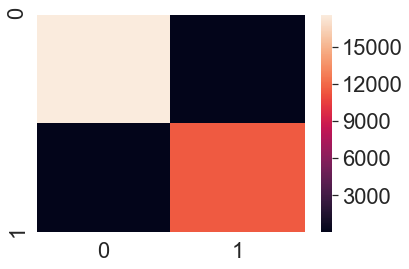

In [429]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm, '\n')

print('Plotting confusion matrix')
sn.set(font_scale = 2)
sn.heatmap(cm, )
plt.show()


In [430]:
# Trying LOGISTIC REGRESSION TO FIND THE MOST IMPORTANT COLUMNS

# Split data into train test, the random state is 42
# splits data into 80, 20

from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, nid_processed['outcome'], test_size=0.20, random_state=42)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(116468, 116)
(116468,)
(29117, 116)
(29117,)


In [431]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

modelLog = LogisticRegression()

modelLog.fit(x_train2, y_train2)

#This predicts the test reults
y_pred = modelLog.predict(x_test2)

/Users/robertocampos/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [434]:
results = pd.DataFrame(y_pred,y_test2)
results.head()

,0
outcome,
0,0
1,1
0,0
1,1
0,0


In [435]:
Acc = modelLog.score(x_test2, y_test2)

print("Accuracy: ", Acc)

Accuracy:  0.99258165332967


In [436]:
conf_mat = confusion_matrix(y_test2, y_pred)
conf_mat

array([[17496,    93],
       [  123, 11405]])

In [437]:
# Measure MSE error.  
score = metrics.mean_squared_error(y_pred,y_test2)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.007418346670330048


In [438]:
names = list(nid_processed.columns.values)
names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'outcome',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_

In [439]:
print('COEF')
print(regressor.coef_, '\n\n\n')
print("INTERCEPT")
print(regressor.intercept_)

COEF
[-0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.01086974
  0.          0.          0.          0.          0.         -0.31332514
 -0.         -0.          0.         -0.03049318 -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.

In [440]:
# Simple function to evaluate the coefficients of a regression

%matplotlib inline    
from IPython.display import display   

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    print('SIGNIFICANT VALUES')
    print(r['coef'].loc[r['coef'] != 0], '\n')
    display(r)
    print("Intercept: {}".format(intercept))
    #r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

In [441]:
names.remove("outcome")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

SIGNIFICANT VALUES
same_srv_rate        -0.313325
dst_host_srv_count   -0.030493
count                 0.010870
Name: coef, dtype: float32 



,coef,positive
same_srv_rate,-0.313325,False
dst_host_srv_count,-0.030493,False
duration,-0.000000,True
service_red_i,-0.000000,True
service_private,0.000000,True
...,...,...
dst_host_srv_serror_rate,0.000000,True
dst_host_serror_rate,0.000000,True
service_bgp,0.000000,True
flag_SH,0.000000,True


Intercept: 0.39675262570381165


____________________________________________________________________________

KEEPING ONLY IMPORTANT COLUMNS, REMOVING ATTACKS WITH LESS THAN 50 ATTACKS

In [443]:
#SIGNIFICANT VALUES
#same_srv_rate        -0.313325
#dst_host_srv_count   -0.030493
#count                 0.010870

# we put them into a dataframe, keep the original

relevent_nid = nid_processed[['same_srv_rate', 'dst_host_srv_count', 'count', 'outcome']]

# adding orig labels
relevent_nid = pd.concat([relevent_nid, outcome_orig], axis = 1)
print('Before cleaning')
print(relevent_nid)

'''
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
'''

# nid.drop(nid[nid.outcome == 'imap.'].index, axis = 0, inplace = True)
# We want to place columns that we wish to drop in a array, or we can drop one by one
# We drop those, then check the count again, those values should not apear
# We are left with 12 attacks

delete_rows_containing = ['guess_passwd', 'buffer_overflow','land.', 'warezmaster.','imap.', 'rootkit.', 'loadmodule.', 'ftp_write.', 'multihop.', 'phf.', 'perl.', 'spy.']
  
for i in range(len(delete_rows_containing)):
    relevent_nid.drop(relevent_nid[relevent_nid.outcome_labels == delete_rows_containing[i]].index, axis = 0, inplace = True)
    
print("\n\n")
print('After cleaning')
print(relevent_nid)

Before cleaning
        same_srv_rate  dst_host_srv_count     count  outcome outcome_labels
0            0.771739           -0.967058 -0.661639        0        normal.
1            0.771739           -0.879885 -0.661639        0        normal.
2            0.771739           -0.792712 -0.681572        0        normal.
3            0.771739           -0.705539 -0.681572        0        normal.
4            0.771739           -0.618366 -0.681572        0        normal.
...               ...                 ...       ...      ...            ...
494015       0.771739            1.090225 -0.701505        0        normal.
494016       0.771739            1.090225 -0.681572        0        normal.
494017       0.771739            1.090225 -0.681572        0        normal.
494018       0.771739            1.090225 -0.681572        0        normal.
494019       0.771739            1.090225 -0.681572        0        normal.

[145585 rows x 5 columns]



After cleaning
        same_srv_rate  dst_

In [451]:
# now we drop the columns output_label

relevent_nid.drop('outcome_labels', axis = 1, inplace = True)

relevent_nid.head()

,same_srv_rate,dst_host_srv_count,count,outcome
0,0.771739,-0.967058,-0.661639,0
1,0.771739,-0.879885,-0.661639,0
2,0.771739,-0.792712,-0.681572,0
3,0.771739,-0.705539,-0.681572,0
4,0.771739,-0.618366,-0.681572,0


In [452]:
# placing into x, y 
x2,y2 = to_xy(relevent_nid, 'outcome')

print(x2)
print(y2)
print('x2 shape: ', x2.shape)
print('y2 shape:', y2.shape)

[[ 0.7717393  -0.96705836 -0.66163874]
 [ 0.7717393  -0.8798853  -0.66163874]
 [ 0.7717393  -0.7927123  -0.68157184]
 ...
 [ 0.7717393   1.090225   -0.68157184]
 [ 0.7717393   1.090225   -0.68157184]
 [ 0.7717393   1.090225   -0.68157184]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
x2 shape:  (145491, 3)
y2 shape: (145491, 2)


In [453]:
# Split data into train test, the random state is 42
# splits data into 80, 20

from sklearn.model_selection import train_test_split

x_train3, x_test3, y_train3, y_test3 = train_test_split(x2, y2, test_size=0.20, random_state=42)

print(x_train3.shape)
print(y_train3.shape)
print(x_test3.shape)
print(y_test3.shape)

(116392, 3)
(116392, 2)
(29099, 3)
(29099, 2)


In [455]:
# Reshaping 
x_train3 = x_train3.reshape(116392, 1, 3, 1)
y_train3 = y_train3.reshape(116392, 2)
x_test3 = x_test3.reshape(29099, 1, 3, 1)
y_test3 = y_test3.reshape(29099, 2)

print('x train3 shape: ', x_train3.shape)
print('y train3 shape: ', y_train3.shape)
print('x test3 shape: ', x_test3.shape)
print('y test3 shape: ', y_test3.shape)

x train3 shape:  (116392, 1, 3, 1)
y train3 shape:  (116392, 2)
x test3 shape:  (29099, 1, 3, 1)
y test3 shape:  (29099, 2)


In [471]:
# CNN model with removed cols and attacks

checkpointer = ModelCheckpoint(filepath="/Users/robertocampos/Desktop/Main_Folder/CSUS_classes/csc180/weights/best_weights_network_cnn_cleaned.hdf5", verbose=0, save_best_only=True)

cnn = Sequential()


cnn.add(Conv2D(32, kernel_size = (1, 1), strides = (1, 1), padding = 'valid',activation = 'relu', input_shape = input_shape))
        

In [472]:
cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 1, 1, 32)          128       
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [475]:
cnn.add(Conv2D(64, (1, 1), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (1, 1), strides = None))
cnn.add(Dropout(.05))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(.05))
cnn.add(Dense(2, activation = 'softmax'))

In [476]:
cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 1, 1, 32)          128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 64)          2112      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)             

In [478]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

cnn.fit(x_train3,y_train3,validation_data=(x_test3,y_test3),callbacks=[monitor,checkpointer],verbose=2,epochs=15)


cnn.load_weights("/Users/robertocampos/Desktop/Main_Folder/CSUS_classes/csc180/weights/best_weights_network_cnn_cleaned.hdf5")

Train on 116392 samples, validate on 29099 samples
Epoch 1/15
116392/116392 - 29s - loss: 0.1054 - val_loss: 0.0989
Epoch 2/15
116392/116392 - 26s - loss: 0.0990 - val_loss: 0.0969
Epoch 3/15
116392/116392 - 26s - loss: 0.0975 - val_loss: 0.0994
Epoch 4/15
116392/116392 - 29s - loss: 0.0969 - val_loss: 0.0952
Epoch 5/15
116392/116392 - 38s - loss: 0.0960 - val_loss: 0.0969
Epoch 6/15
116392/116392 - 33s - loss: 0.0961 - val_loss: 0.0939
Epoch 7/15
116392/116392 - 31s - loss: 0.0954 - val_loss: 0.0938
Epoch 8/15
116392/116392 - 31s - loss: 0.0954 - val_loss: 0.0943
Epoch 9/15
116392/116392 - 27s - loss: 0.0948 - val_loss: 0.0944
Epoch 10/15
116392/116392 - 27s - loss: 0.0947 - val_loss: 0.0928
Epoch 11/15
116392/116392 - 26s - loss: 0.0945 - val_loss: 0.0936
Epoch 12/15
116392/116392 - 27s - loss: 0.0941 - val_loss: 0.0947
Epoch 13/15
116392/116392 - 27s - loss: 0.0943 - val_loss: 0.0935
Epoch 14/15
116392/116392 - 27s - loss: 0.0941 - val_loss: 0.0928
Epoch 15/15
116392/116392 - 27s - 

In [483]:
# Metrics for nid_relevent dataframe only using:

#SIGNIFICANT VALUES
#same_srv_rate        -0.313325
#dst_host_srv_count   -0.030493
#count                 0.010870

# and Taking out the attachs with less than 50 records


y_true2 = np.argmax(y_test3,axis=1)
pred2 = cnn.predict(x_test3)
pred2 = np.argmax(pred2,axis=1)

f1_2 = metrics.f1_score(y_true2, pred2, average='weighted')
print('Averaged F1: {}'.format(f1_2))

           
print(metrics.classification_report(y_true2, pred2))

Averaged F1: 0.9711524548544497
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17571
           1       1.00      0.93      0.96     11528

    accuracy                           0.97     29099
   macro avg       0.98      0.96      0.97     29099
weighted avg       0.97      0.97      0.97     29099



In [485]:
accc = metrics.accuracy_score(y_true2, pred2)


print("Accuracy score: ", accc)

Accuracy score:  0.9713392212790818


In [490]:
bal = metrics.balanced_accuracy_score(y_true2, pred2)
print("Balanced accuracy: ", bal)

Balanced accuracy:  0.9643343704263827


In [491]:
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
# Compute confusion matrix
cm2 = confusion_matrix(y_true2, pred2)
print(cm2, '\n')

[[17537    34]
 [  800 10728]] 

